# Evaluate a pre-trained EKF model

In this section we will show the (best)test error for the three datasets using a pretrained model 

In [1]:
from load import load_bikes_data,load_abalone_data,load_wine_data
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import knn as kalman
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import knn as kalman
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150

In [2]:
scaler = MinMaxScaler()
def evaluate(mlp,X,y):
    with torch.no_grad():
        x_test = torch.tensor(X_scaled, dtype=torch.float64)
        y_pred = mlp.forward(x_test)
        y_pred = y_pred.cpu().data.numpy()
        error = mean_squared_error(y,y_pred)
        return (np.sqrt(error))
class MLP(nn.Module):
    def __init__(self, n_inputs, n_hidden_layer, n_outputs,bias=True):
        super(MLP, self).__init__()
        # YOUR CODE HERE
        #raise NotImplementedError()
        self.fc1 = nn.Linear(n_inputs, n_hidden_layer, bias)
        self.fc2 = nn.Linear(n_hidden_layer, n_hidden_layer, bias)
        #self.fc3 = nn.Linear(n_hidden_layer, n_hidden_layer, bias)
        self.fc4 = nn.Linear(n_hidden_layer, n_outputs, bias)
        

    def forward(self, x):
        # YOUR CODE HERE
        #raise NotImplementedError()
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        #x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x   

## Abalone Dataset

In [3]:
X,y = load_abalone_data() 
X_scaled = scaler.fit_transform(X)

### EKF 

In [4]:
abalone_ekf = kalman.load_knn('saved_models/abalone/efk_sigmoid_1.983.knn')

In [5]:
y_pred = abalone_ekf.feedforward(X_scaled)
error = mean_squared_error(y,y_pred)
error_ekf = np.sqrt(error)
print(f"The total error for the model is {error_ekf:.6f}")

The total error for the model is 2.048454


### SGD

In [6]:
mlp_1_10 = torch.load("saved_models/abalone/sgd_1_10_epochs_2305.pt")
error_sgd_10 = evaluate(mlp_1_10,X_scaled,y)
print(f"The total error for the model is {error_sgd_10:.6f}")

The total error for the model is 2.109905


In [7]:
mlp_1_20 = torch.load("saved_models/abalone/sgd_1_20_epochs_2000.pt")
error_sgd_20 = evaluate(mlp_1_20,X_scaled,y)
print(f"The total error for the model is {error_sgd_20:.6f}")

The total error for the model is 2.145371


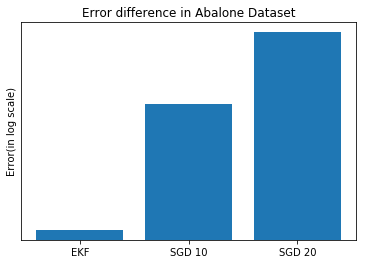

In [8]:
plt.bar(['EKF',"SGD 10","SGD 20"],[error_ekf,error_sgd_10,error_sgd_20],log=True)
plt.ylabel('Error(in log scale)')
plt.title("Error difference in Abalone Dataset")

plt.show()

## Bikes Dataset

### EKF

In [9]:
X,y = load_bikes_data() 
X_scaled = scaler.fit_transform(X)

In [10]:
bikes_ekf = kalman.load_knn('saved_models/bikes/efk_val_7.7e-4.knn')

In [12]:
y_pred = bikes_ekf.feedforward(X_scaled)
error = mean_squared_error(y,y_pred)
error_ekf = np.sqrt(error)
print(f"The total error for the model is {error_ekf:.6} after 20 epochs")

The total error for the model is 0.000388937 after 20 epochs


### SGD

In [13]:
mlp_1_10 = torch.load("saved_models/bikes/sgd_1_10_epochs_5000.pt")
error_sgd_10 = evaluate(mlp_1_10,X_scaled,y)
print(f"The total error for the model is {error_sgd_10:.6f} after 5000 epochs")

The total error for the model is 0.073246 after 5000 epochs


In [14]:
mlp_1_20 = torch.load("saved_models/bikes/sgd_1_20_epochs_8000.pt")
error_sgd_20 = evaluate(mlp_1_20,X_scaled,y)
print(f"The total error for the model is {error_sgd_20:.6f} after 8000 epochs")

The total error for the model is 0.059866 after 8000 epochs


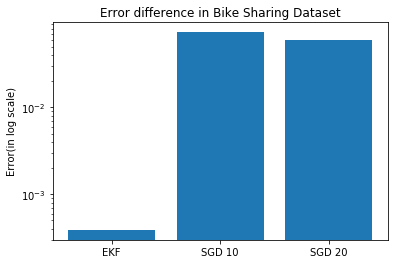

In [15]:
plt.bar(['EKF',"SGD 10","SGD 20"],[error_ekf,error_sgd_10,error_sgd_20],log=True)
plt.ylabel('Error(in log scale)')
plt.title("Error difference in Bike Sharing Dataset")
plt.show()

## Wine Quality Dataset

In [16]:
X,y = load_wine_data() 
X_scaled = scaler.fit_transform(X)

In [17]:
wine_ekf = kalman.load_knn('saved_models/winequality/efk.knn')

In [18]:
y_pred = wine_ekf.feedforward(X_scaled)
error = mean_squared_error(y,y_pred)
test_error = np.sqrt(error)
print(f"The total error for the model is {test_error:.6}")

The total error for the model is 0.707596
